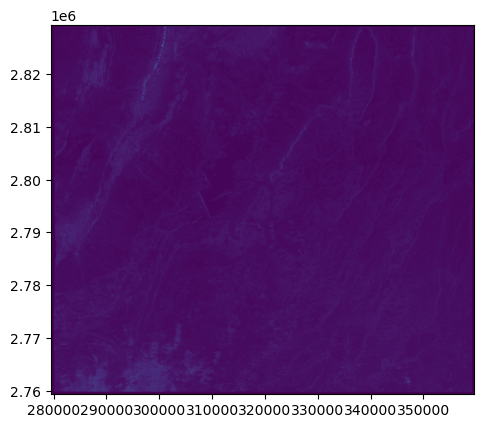

<Axes: >

In [3]:
import rasterio
from rasterio.plot import show
from PIL import Image
img = rasterio.open("D:\\UNI\\DIP SIR AEHTESHAM\\TIF FILE\\HV-ALPSRP268500490-H2.2_UA.tif")
show(img)

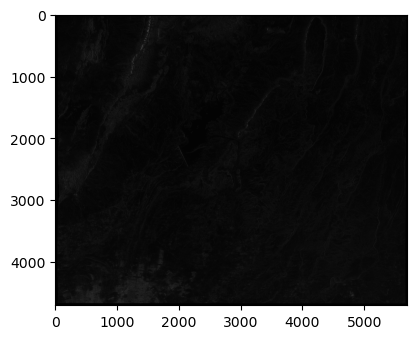

In [4]:
#Reading Multiple Bands
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='gray')
plt.show()

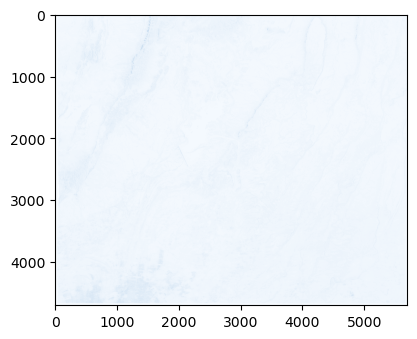

In [7]:
import matplotlib.pyplot as plt
img_band2 = img.read(1)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='Blues')
plt.show()


In [12]:
import rasterio

with rasterio.open("D:\\UNI\\DIP SIR AEHTESHAM\\TIF FILE\\HV-ALPSRP268500490-H2.2_UA.tif") as dataset:
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5700 x 4700
Number of Bands: 1


In [13]:
img.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 42N",GEOGCS["ITRF97 (geocentric)",DATUM["unnamed",SPHEROID["GRS 1980",6378137,298.257221538149,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6655"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4338"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",69],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32642"]]')

In [14]:
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 5700, 'height': 4700, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 42N",GEOGCS["ITRF97 (geocentric)",DATUM["unnamed",SPHEROID["GRS 1980",6378137,298.257221538149,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6655"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4338"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",69],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32642"]]'), 'transform': Affine(12.317447302774111, 2.115500740230156, 279450.472925,
       2.115579940204188, -12.316987521806213, 2817257.505825001)}


In [15]:
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))

Raster Decription: (None,)



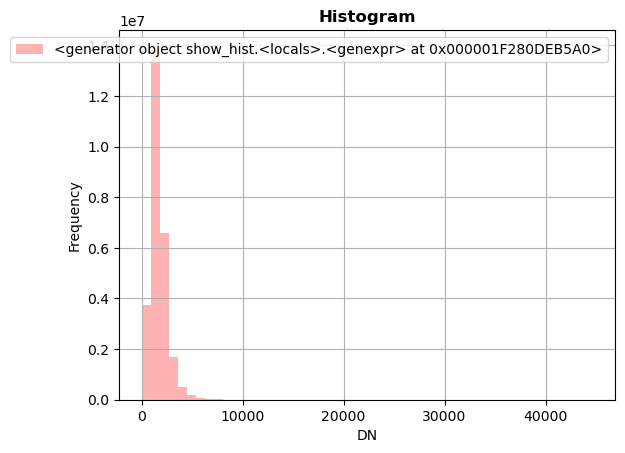

In [16]:
# Plot Pixel Value Histogram In Each Band. 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

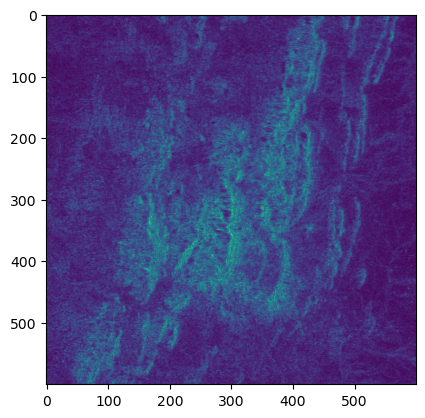

In [17]:
#Clipping
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("D:\\UNI\\DIP SIR AEHTESHAM\\TIF FILE\\HV-ALPSRP268500490-H2.2_UA.tif", 'r') as src:
    img = src.read()
clipped_img = img[:, 300:900, 300:900]

plt.imshow(clipped_img.transpose(1, 2, 0))
plt.show()

C:\Users\SYED\AppData\Local\Temp\ipykernel_14676\1123327845.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
C:\Users\SYED\AppData\Local\Temp\ipykernel_14676\1123327845.py:6: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))


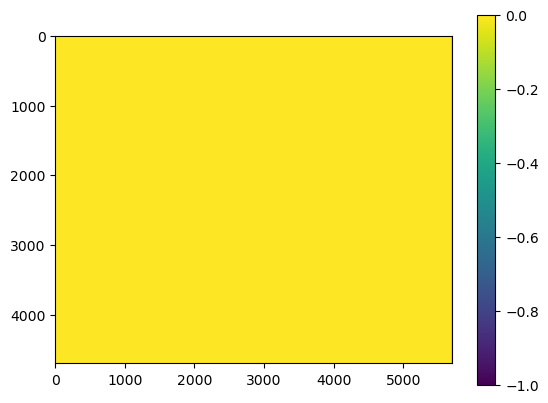

In [23]:
#Calculating NDVI Or Desired Parameters
red_clipped = img[0].astype('f4')
nir_clipped = img[0].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()